In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# About this dataset
* Age : Age of the patient

* Sex : Sex of the patient

* exang: exercise induced angina (1 = yes; 0 = no)

* ca: number of major vessels (0-3)

* cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

* trtbps : resting blood pressure (in mm Hg)

* chol : cholestoral in mg/dl fetched via BMI sensor

* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* thalach : maximum heart rate achieved

* target : 0= less chance of heart attack 1= more chance of heart attack

In [204]:
data = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [120]:
o2 = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv')
o2

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
...,...
3580,98.6
3581,98.6
3582,98.6
3583,98.6


<AxesSubplot:>

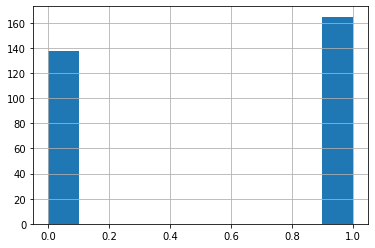

In [8]:
data.output.hist()

In [10]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

# EDA

Text(0.5, 1.0, 'Sex vs Target')

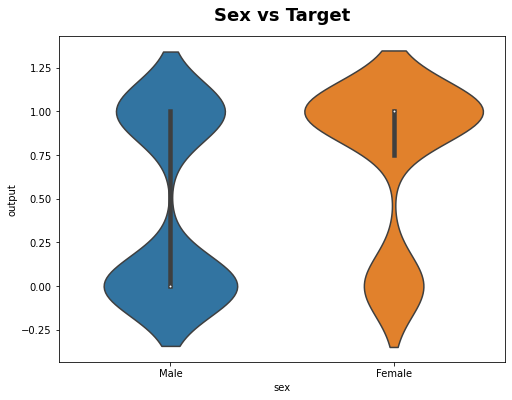

In [39]:
eda = data.copy()
eda.sex.replace({0:'Female', 1:'Male'}, inplace=True)

fig = plt.figure(figsize=(8,6))
sns.violinplot(x='sex', y='output', data=eda)
plt.title('Sex vs Target', fontsize=18, pad=15, fontweight='bold')
# 여성이 Heart Attack 위험성이 높다.

남성과 여성들의 나이 분포를 알아보자

In [32]:
eda.groupby('sex')['age'].describe()
# 우선 남성의 표본 숫자가 많다.
# 여성의 표본 평균 나이는 55.7세, 남성의 평균 나이는 53.8세
# 여성의 나이 분포가 조금 더 올라가있다.

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,96.0,55.677083,9.409396,34.0,49.75,57.0,63.0,76.0
Male,207.0,53.758454,8.883803,29.0,47.00,54.0,59.5,77.0


Text(0.5, 1.0, 'Sex vs Age')

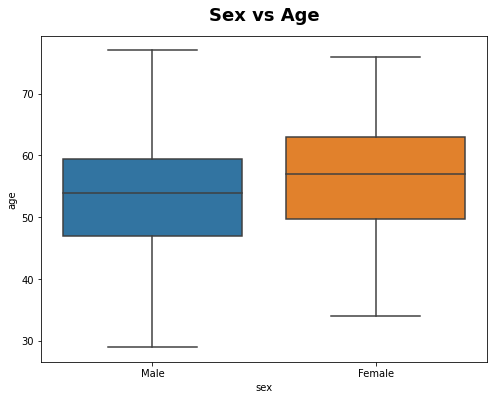

In [40]:
plt.figure(figsize=(8,6))
sns.boxplot(x='sex', y='age', data=eda)
plt.title('Sex vs Age', fontsize=18, pad=15, fontweight='bold')

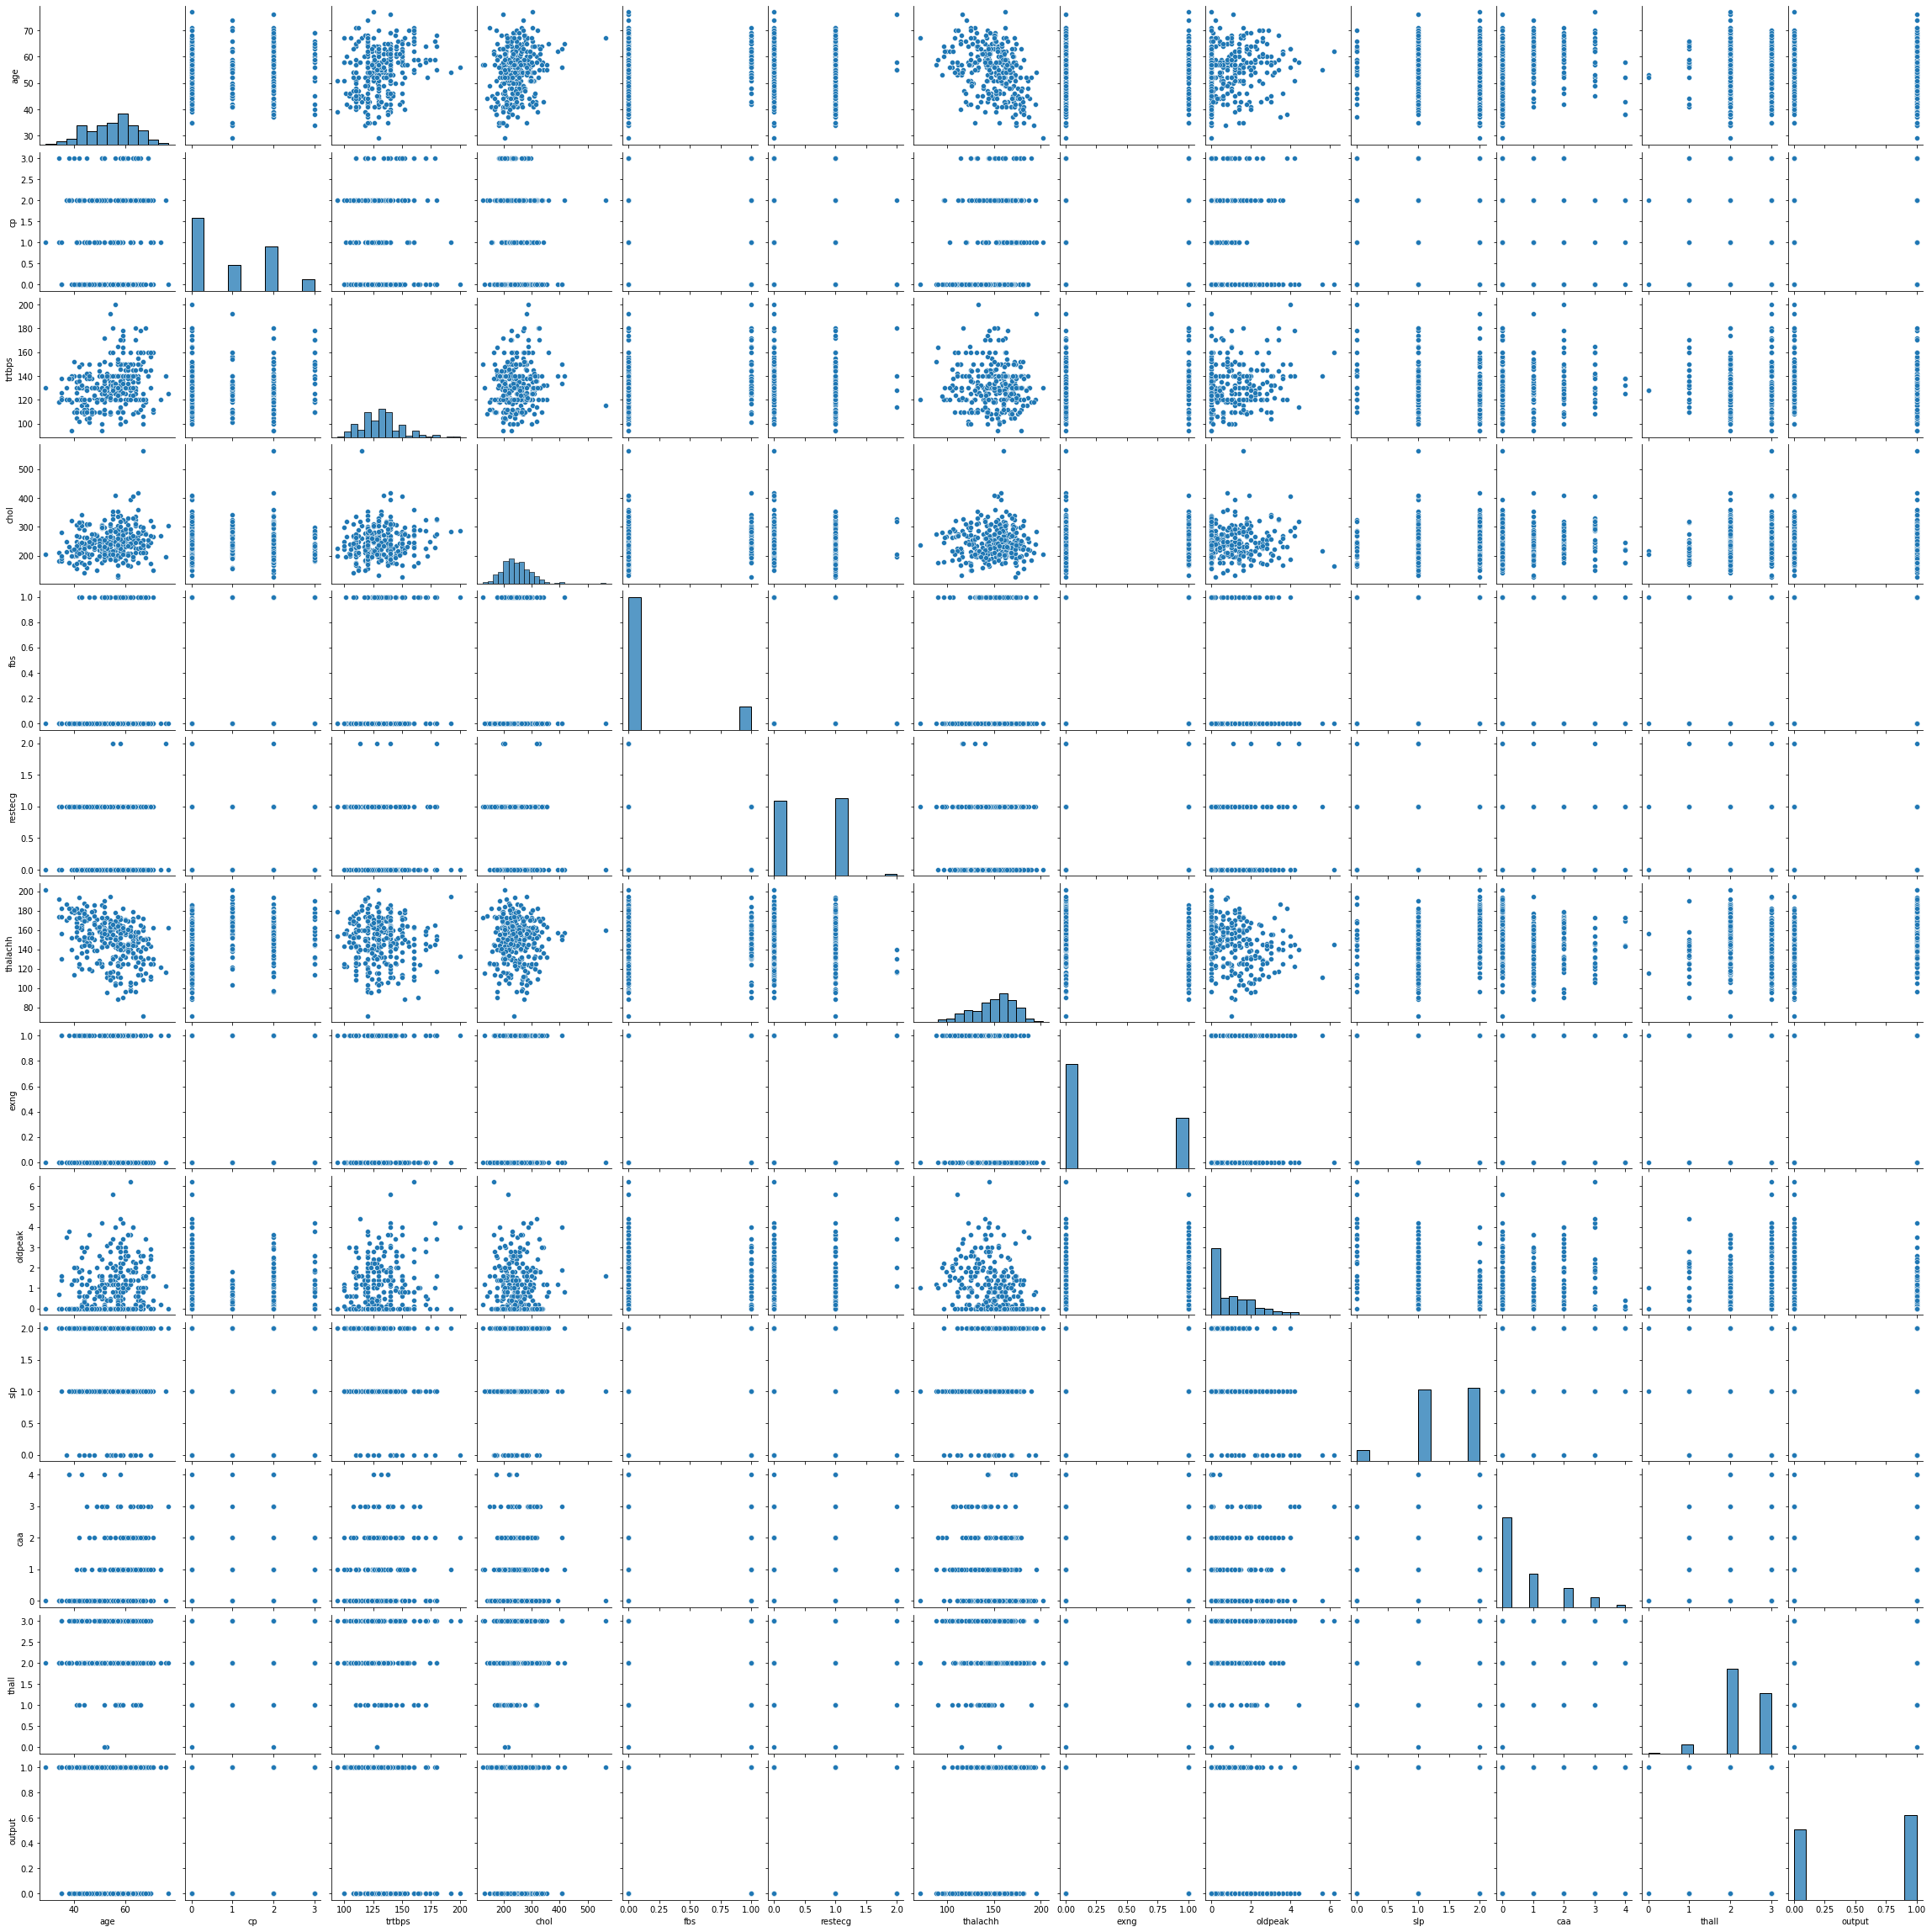

In [41]:
sns.pairplot(data=eda)

# Feature Engineering

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trtbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalachh'}>],
       [<AxesSubplot:title={'center':'exng'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>],
       [<AxesSubplot:title={'center':'thall'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

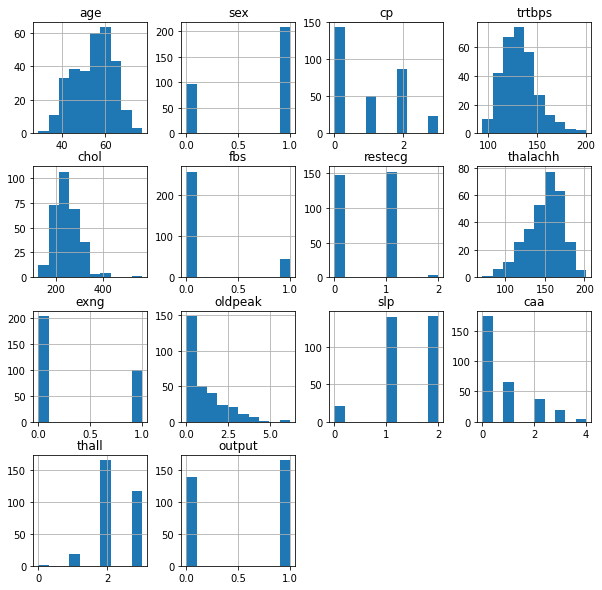

In [44]:
data.hist(figsize=(10,10))

<AxesSubplot:>

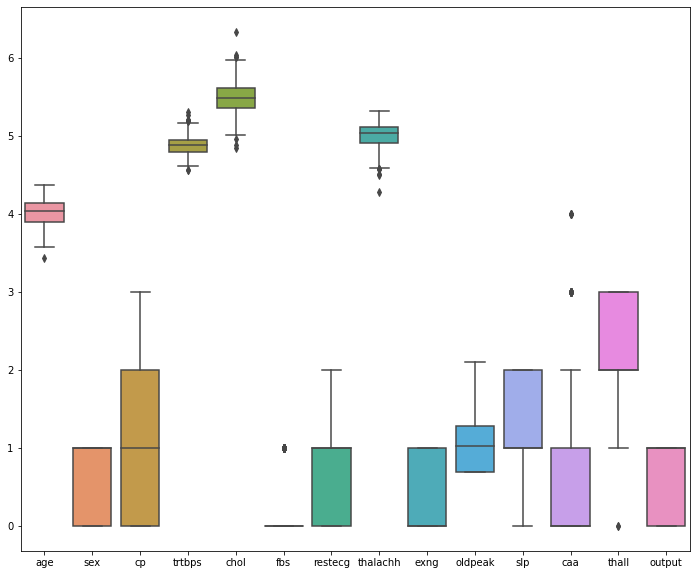

In [126]:
fig = plt.figure(figsize=(12,10))
sns.boxplot(data=data)
# 이상값이 꽤 발견된다.
# 로그변환으로 해결해보자

In [205]:
# log 변환
for i in data.columns:
    if data[i].nunique() > 5:
        data[i] = np.log1p(1+data[i])

# Modeling

* Tree model

In [185]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, make_scorer
import catboost
import xgboost as xgb
import lightgbm as lgbm
import warnings
warnings.filterwarnings('ignore')

scorer = make_scorer(accuracy_score, greater_is_better=True, needs_proba=False)

In [206]:
x = data.drop(columns='output')
y = data['output']
x.shape, y.shape

((303, 13), (303,))

In [237]:
acc_values = pd.Series(accuracy_xgb.values())
acc_values.mean()

0.8580645161290322

In [324]:
n_splits=10
seed = 40
skf = StratifiedKFold(n_splits = n_splits, random_state = seed, shuffle=True)
accuracy_xgb = {}
param_xgb = {'learning_rate': 0.031236864705669574, 'reg_alpha': 1.9951021385162988e-05, 'reg_lambda': 0.03661633689025431, 'max_depth': 1, 'num_leaves': 5, 'colsample_bytree': 0.41007098183995827, 'subsample': 0.9703327113661737, 'subsample_freq': 4, 'min_child_samples': 93, 'max_bin': 500}

for i, (train_index, valid_index) in enumerate(skf.split(x, y)):
    x_train, x_valid = x.iloc[train_index], x.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    model_xgb = xgb.XGBClassifier(n_estimators=3000, **param_xgb)
    model_xgb.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_valid, y_valid)], eval_metric='error', verbose=100, early_stopping_rounds=70)
    
    predsproba_valid_xgb = model_xgb.predict_proba(x_valid)
    preds_valid_xgb = np.argmax(predsproba_valid_xgb, axis=1)
    preds_valid_xgb = pd.Series(preds_valid_xgb, index=x_valid.index)
    accuracy_xgb[i] = accuracy_score(preds_valid_xgb, y_valid)
    print(f'{i}fold Accuracy:{accuracy_score(preds_valid_xgb, y_valid)}')
    
acc_values = pd.Series(accuracy_xgb.values())
print('acc_xgb_max:', acc_values.max())
print('acc_xgb_mean:',acc_values.mean())

[0]	validation_0-error:0.28676	validation_1-error:0.22581
[100]	validation_0-error:0.14338	validation_1-error:0.16129
[106]	validation_0-error:0.14338	validation_1-error:0.16129
0fold Accuracy:0.9032258064516129
[0]	validation_0-error:0.27206	validation_1-error:0.35484
[88]	validation_0-error:0.14338	validation_1-error:0.29032
1fold Accuracy:0.7419354838709677
[0]	validation_0-error:0.27941	validation_1-error:0.29032
[100]	validation_0-error:0.15441	validation_1-error:0.09677
[102]	validation_0-error:0.15809	validation_1-error:0.09677
2fold Accuracy:0.967741935483871
[0]	validation_0-error:0.27839	validation_1-error:0.30000
[72]	validation_0-error:0.14286	validation_1-error:0.23333
3fold Accuracy:0.7666666666666667
[0]	validation_0-error:0.27839	validation_1-error:0.30000
[87]	validation_0-error:0.13187	validation_1-error:0.16667
4fold Accuracy:0.8666666666666667
[0]	validation_0-error:0.28205	validation_1-error:0.26667
[100]	validation_0-error:0.14652	validation_1-error:0.20000
[105]	

In [271]:
predsproba_valid_xgb

array([[0.35046107, 0.64953893],
       [0.29726404, 0.70273596],
       [0.46237707, 0.5376229 ],
       [0.21018666, 0.78981334],
       [0.21018666, 0.78981334],
       [0.21018666, 0.78981334],
       [0.4175191 , 0.5824809 ],
       [0.25534147, 0.7446585 ],
       [0.25534147, 0.7446585 ],
       [0.51584005, 0.48415998],
       [0.3386526 , 0.6613474 ],
       [0.22686881, 0.7731312 ],
       [0.21018666, 0.78981334],
       [0.22136009, 0.7786399 ],
       [0.24730337, 0.75269663],
       [0.4725383 , 0.5274617 ],
       [0.79232866, 0.20767134],
       [0.7775009 , 0.22249909],
       [0.79232866, 0.20767134],
       [0.3563422 , 0.6436578 ],
       [0.7775009 , 0.22249909],
       [0.30839658, 0.6916034 ],
       [0.7840797 , 0.21592031],
       [0.61684084, 0.38315916],
       [0.767478  , 0.23252201],
       [0.5392735 , 0.46072653],
       [0.5389121 , 0.46108788],
       [0.6546142 , 0.34538582],
       [0.25534147, 0.7446585 ],
       [0.7840797 , 0.21592031]], dtype=flo

Text(0.5, 1.0, 'y vs preds')

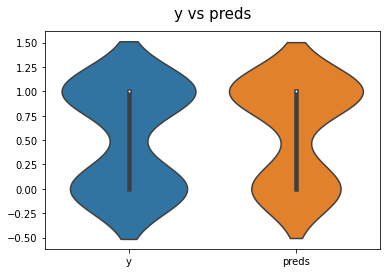

In [178]:
con_preds = pd.concat([y_valid,preds_valid], axis=1, keys=['y', 'preds'])
sns.violinplot(data=con_preds, scale='count')
plt.title('y vs preds', fontsize=15, pad=13)

In [314]:
n_splits=10
seed = 40
skf = StratifiedKFold(n_splits = n_splits, random_state = seed, shuffle=True)
accuracy_lgbm = {}
lgbm_params = {'learning_rate': 0.0969584931918281, 'reg_alpha': 2.3256233372599825e-05, 'reg_lambda': 0.0845549053457876, 'max_depth': 9, 'num_leaves': 154, 'colsample_bytree': 0.9531245410138701, 'subsample': 0.36194475143634364, 'subsample_freq': 2, 'min_child_samples': 9, 'max_bin': 297}

for i, (train_index, valid_index) in enumerate(skf.split(x, y)):
    x_train, x_valid = x.iloc[train_index], x.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    model_lgbm = lgbm.LGBMClassifier(n_estimators=3000, **lgbm_params)
    model_lgbm.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_valid, y_valid)], eval_metric='error', verbose=100, early_stopping_rounds=70)
    
    preds_valid_lgbm = model_lgbm.predict(x_valid)
    preds_valid_lgbm = pd.Series(preds_valid_lgbm, index=x_valid.index)
    accuracy_lgbm[i] = accuracy_score(preds_valid_lgbm, y_valid)
    print(f'{i}fold Accuracy:{accuracy_score(preds_valid_lgbm, y_valid)}')
    
acc_values = pd.Series(accuracy_lgbm.values())
print('acc_lgbm_max:', acc_values.max())
print('acc_lgbm_mean:',acc_values.mean())

Training until validation scores don't improve for 70 rounds
Early stopping, best iteration is:
[20]	training's binary_error: 0.110294	training's binary_logloss: 0.334118	valid_1's binary_error: 0.0967742	valid_1's binary_logloss: 0.336913
0fold Accuracy:0.9032258064516129
Training until validation scores don't improve for 70 rounds
Early stopping, best iteration is:
[15]	training's binary_error: 0.110294	training's binary_logloss: 0.365869	valid_1's binary_error: 0.258065	valid_1's binary_logloss: 0.497665
1fold Accuracy:0.7419354838709677
Training until validation scores don't improve for 70 rounds
[100]	training's binary_error: 0.0367647	training's binary_logloss: 0.139355	valid_1's binary_error: 0.0967742	valid_1's binary_logloss: 0.319013
Early stopping, best iteration is:
[32]	training's binary_error: 0.102941	training's binary_logloss: 0.281487	valid_1's binary_error: 0.0645161	valid_1's binary_logloss: 0.300001
2fold Accuracy:0.9354838709677419
Training until validation scores 

In [247]:
data_cat = data.copy()
for i in data_cat.drop(columns='output').columns:
    if data_cat[i].nunique() < 4:
        data_cat[i] = data_cat[i].astype('str')

In [249]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalachh  303 non-null    float64
 8   exng      303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    object 
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 33.3+ KB


In [254]:
x_cat = data_cat.drop(columns='output')
y_cat = data_cat['output']
x_cat.shape, y_cat.shape

((303, 13), (303,))

In [255]:
n_splits=10
seed = 40
skf = StratifiedKFold(n_splits = n_splits, random_state = seed, shuffle=True)
cat_features = x.select_dtypes('object').columns
acc_cat = {}

for i, (train_index, valid_index) in enumerate(skf.split(x_cat, y_cat)):
    x_train, x_valid = x.iloc[train_index], x.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    model_cat = catboost.CatBoostClassifier(n_estimators=3000, learning_rate=0.05, cat_features=cat_features)
    model_cat.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_valid, y_valid)], verbose=100, early_stopping_rounds=70)
    
    preds_valid_cat = model_cat.predict(x_valid)
    preds_valid_cat = pd.Series(preds_valid_cat, index=x_valid.index)
    acc_cat[i] = accuracy_score(preds_valid_cat, y_valid)
    print(f'{i}fold Accuracy:{accuracy_score(preds_valid_cat, y_valid)}')
    
acc_values = pd.Series(acc_cat.values())
print('acc_lgbm_max:', acc_values.max())
print('acc_lgbm_mean:',acc_values.mean())

0:	learn: 0.6530004	test: 0.6530004	test1: 0.6556904	best: 0.6556904 (0)	total: 1.01ms	remaining: 3.03s
100:	learn: 0.1306535	test: 0.1306535	test1: 0.2897645	best: 0.2877467 (93)	total: 80.9ms	remaining: 2.32s
Stopped by overfitting detector  (70 iterations wait)

bestTest = 0.2800292871
bestIteration = 113

Shrink model to first 114 iterations.
0fold Accuracy:0.8387096774193549
0:	learn: 0.6497499	test: 0.6497499	test1: 0.6581499	best: 0.6581499 (0)	total: 929us	remaining: 2.79s
100:	learn: 0.1138220	test: 0.1138220	test1: 0.5513578	best: 0.4673992 (36)	total: 74.8ms	remaining: 2.15s
Stopped by overfitting detector  (70 iterations wait)

bestTest = 0.4673992284
bestIteration = 36

Shrink model to first 37 iterations.
1fold Accuracy:0.7419354838709677
0:	learn: 0.6554037	test: 0.6554037	test1: 0.6430137	best: 0.6430137 (0)	total: 907us	remaining: 2.72s
100:	learn: 0.1359583	test: 0.1359583	test1: 0.2628121	best: 0.2613955 (85)	total: 75.3ms	remaining: 2.16s
Stopped by overfitting dete

In [338]:
def model(clf):
    n_splits=10
    seed = 40
    skf = StratifiedKFold(n_splits = n_splits, random_state = seed, shuffle=True)
    acc = {}

    for i, (train_index, valid_index) in enumerate(skf.split(x, y)):
        x_train, x_valid = x.iloc[train_index], x.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
        model = clf
        model.fit(x_train, y_train)
        
        preds = model.predict(x_valid)
        acc[i] = accuracy_score(preds, y_valid)
        
        print(f'{i+1}fold Accuracy:{accuracy_score(preds, y_valid)}')

    return preds, acc

# Tuning

* lgbm

In [310]:
import optuna
from optuna import Trial
from optuna.samplers import TPESampler

def objective(trial: Trial) -> float:
    params_lgb = {
        "random_state": 42,
        "verbosity": -1,
        "learning_rate": trial.suggest_float('learning_rate', 0.000001, 0.1),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 3e-5),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 9e-2),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),
        "subsample": trial.suggest_float("subsample", 0.3, 1.0),
        "subsample_freq": trial.suggest_int("subsample_freq", 1, 10),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "max_bin": trial.suggest_int("max_bin", 200, 500),
    }
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=40)
    for i, (train_indice, valid_indice) in enumerate(skf.split(X=x, y=y)):
      X_train, X_valid = x.iloc[train_indice], x.iloc[valid_indice]
      Y_train, Y_valid = y.iloc[train_indice], y.iloc[valid_indice]

      model = lgbm.LGBMClassifier(**params_lgb)
      model.fit(
          X_train,
          Y_train,
          eval_set=[(X_train, Y_train), (X_valid, Y_valid)],
          early_stopping_rounds=100,
          verbose=False,
          )

    lgb_pred = model.predict(X_valid)
    accuracy = accuracy_score(Y_valid, lgb_pred)
    
    return accuracy

In [313]:
sampler = TPESampler(seed=42)
study = optuna.create_study(
    study_name="lgbm_parameter_opt",
    direction="maximize",
    sampler=sampler,
)
study.optimize(objective, n_trials=100)
print("Best Score:", study.best_value)
print("Best trial:", study.best_trial.params)

[I 2021-06-08 09:42:45,543] A new study created in memory with name: lgbm_parameter_opt
[I 2021-06-08 09:42:45,746] Trial 0 finished with value: 0.5333333333333333 and parameters: {'learning_rate': 0.0374546373446174, 'reg_alpha': 2.8521922049233386e-05, 'reg_lambda': 0.06587945744308704, 'max_depth': 6, 'num_leaves': 41, 'colsample_bytree': 0.49359671220172163, 'subsample': 0.3406585285177396, 'subsample_freq': 9, 'min_child_samples': 62, 'max_bin': 413}. Best is trial 0 with value: 0.5333333333333333.
[I 2021-06-08 09:42:46,001] Trial 1 finished with value: 0.6333333333333333 and parameters: {'learning_rate': 0.002059428845085949, 'reg_alpha': 2.909759646633821e-05, 'reg_lambda': 0.07491983934761154, 'max_depth': 3, 'num_leaves': 48, 'colsample_bytree': 0.5100427059120604, 'subsample': 0.5129695700716763, 'subsample_freq': 6, 'min_child_samples': 46, 'max_bin': 287}. Best is trial 1 with value: 0.6333333333333333.
[I 2021-06-08 09:42:46,242] Trial 2 finished with value: 0.76666666666

Best Score: 0.9
Best trial: {'learning_rate': 0.0969584931918281, 'reg_alpha': 2.3256233372599825e-05, 'reg_lambda': 0.0845549053457876, 'max_depth': 9, 'num_leaves': 154, 'colsample_bytree': 0.9531245410138701, 'subsample': 0.36194475143634364, 'subsample_freq': 2, 'min_child_samples': 9, 'max_bin': 297}


In [288]:
optuna.visualization.plot_param_importances(study)

* xgb

In [321]:
import optuna
from optuna import Trial
from optuna.samplers import TPESampler

def objective(trial: Trial) -> float:
    params_xgb = {
        "random_state": 42,
        "learning_rate": trial.suggest_float('learning_rate', 0.000001, 0.1),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 3e-5),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 9e-2),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),
        "subsample": trial.suggest_float("subsample", 0.3, 1.0),
        "subsample_freq": trial.suggest_int("subsample_freq", 1, 10),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "max_bin": trial.suggest_int("max_bin", 200, 500),
    }
    
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=40)
    for i, (train_indice, valid_indice) in enumerate(skf.split(x, y)):
      X_train, X_valid = x.iloc[train_indice], x.iloc[valid_indice]
      Y_train, Y_valid = y.iloc[train_indice], y.iloc[valid_indice]

      model = xgb.XGBClassifier(**params_xgb)
      model.fit(
          X_train,
          Y_train,
          eval_set=[(X_train, Y_train), (X_valid, Y_valid)],
          early_stopping_rounds=100,
          verbose=False,
          )

    xgb_pred = model.predict(X_valid)
    accuracy = accuracy_score(Y_valid, xgb_pred)
    
    return accuracy

In [322]:
sampler = TPESampler(seed=42)
study = optuna.create_study(
    study_name="xgb_parameter_opt",
    direction="maximize",
    sampler=sampler,
)
study.optimize(objective, n_trials=100)
print("Best Score:", study.best_value)
print("Best trial:", study.best_trial.params)

[I 2021-06-08 09:44:56,142] A new study created in memory with name: xgb_parameter_opt
[I 2021-06-08 09:44:56,853] Trial 0 finished with value: 0.8 and parameters: {'learning_rate': 0.0374546373446174, 'reg_alpha': 2.8521922049233386e-05, 'reg_lambda': 0.06587945744308704, 'max_depth': 6, 'num_leaves': 41, 'colsample_bytree': 0.49359671220172163, 'subsample': 0.3406585285177396, 'subsample_freq': 9, 'min_child_samples': 62, 'max_bin': 413}. Best is trial 0 with value: 0.8.
[I 2021-06-08 09:44:57,484] Trial 1 finished with value: 0.8333333333333334 and parameters: {'learning_rate': 0.002059428845085949, 'reg_alpha': 2.909759646633821e-05, 'reg_lambda': 0.07491983934761154, 'max_depth': 3, 'num_leaves': 48, 'colsample_bytree': 0.5100427059120604, 'subsample': 0.5129695700716763, 'subsample_freq': 6, 'min_child_samples': 46, 'max_bin': 287}. Best is trial 1 with value: 0.8333333333333334.
[I 2021-06-08 09:44:58,161] Trial 2 finished with value: 0.8666666666666667 and parameters: {'learnin

Best Score: 0.9
Best trial: {'learning_rate': 0.031236864705669574, 'reg_alpha': 1.9951021385162988e-05, 'reg_lambda': 0.03661633689025431, 'max_depth': 1, 'num_leaves': 5, 'colsample_bytree': 0.41007098183995827, 'subsample': 0.9703327113661737, 'subsample_freq': 4, 'min_child_samples': 93, 'max_bin': 500}
